<a href="https://colab.research.google.com/github/hammaad2002/AdversarialAttack/blob/main/Adversarial_Attack_on_DNN_or_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install adversarial-robustness-toolbox[Keras]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
#importing ART toolbox
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier

#importing data from MNIST

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

#declaring layers of model

model = keras.Sequential([
    tf.keras.Input(shape=(28*28,)),
    layers.Dense(512,activation='relu'),
    layers.Dense(10 ,activation='softmax')
])

#hyperparameters declaration

model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=["accuracy"])

#normalizing data

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

#fitting or training model on normalized data

classifier = KerasClassifier(model=model, clip_values=(0, 1), use_logits=False)
classifier.fit(train_images, train_labels, batch_size=128, nb_epochs=5)

#model.fit(train_images,train_labels,epochs=5,batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2527 - accuracy: 0.9271
Epoch 2/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.1033 - accuracy: 0.9691
Epoch 3/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0692 - accuracy: 0.9791
Epoch 4/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0495 - accuracy: 0.9854
Epoch 5/5
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0378 - accuracy: 0.9882


In [9]:
#evaluating models on test data
#test_loss,test_acc = model.evaluate(test_images,test_labels)
#print(f"test_acc:{test_acc*100}%")

predictions = classifier.predict(test_images)
accuracy = np.sum(np.argmax(predictions,axis=-1) == test_labels) / len(test_labels)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

Accuracy on benign test examples: 97.96000000000001%


In [10]:
# Step 6: Generate adversarial test examples

attack = FastGradientMethod(estimator=classifier, eps=0.2)
x_test_adv = attack.generate(x=test_images)

In [11]:
# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions,axis=-1) == test_labels ) / len(test_labels)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))

Accuracy on adversarial test examples: 2.3%


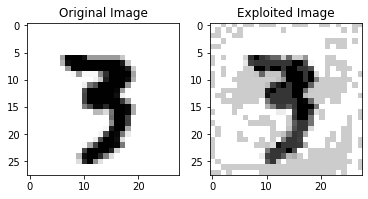

In [14]:
#plotting adversarial examples
from tensorflow.keras.datasets import mnist
(train_images1,train_labels1),(test_images1,test_labels1) = mnist.load_data()
import matplotlib.pyplot as plt
import tensorflow as tf
import random as rn
temp= rn.randint(0,10000)
z = x_test_adv[temp]
z = tf.convert_to_tensor(z)
z_new = tf.reshape(z, (28, 28))
z_new = z_new.eval(session=tf.compat.v1.Session())
plt.subplot(121)
digit = test_images1[temp]
plt.imshow(digit,cmap=plt.cm.binary)
plt.title("Original Image")
plt.subplot(122)
plt.imshow(z_new,cmap=plt.cm.binary)
plt.title("Exploited Image")
plt.show()

In [15]:
predictions = classifier.predict( [x_test_adv[temp],]  )
print("Prediction after performing attack: ",predictions.argmax())
print("Ground truth: ",test_labels[temp])

Prediction after performing attack:  9
Ground truth:  3
